In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
import scipy.optimize
import scipy.special


from matplotlib import rc
plt.style.use('default')
rc('text', usetex=True)

## Plot F Function

<IPython.core.display.Javascript object>


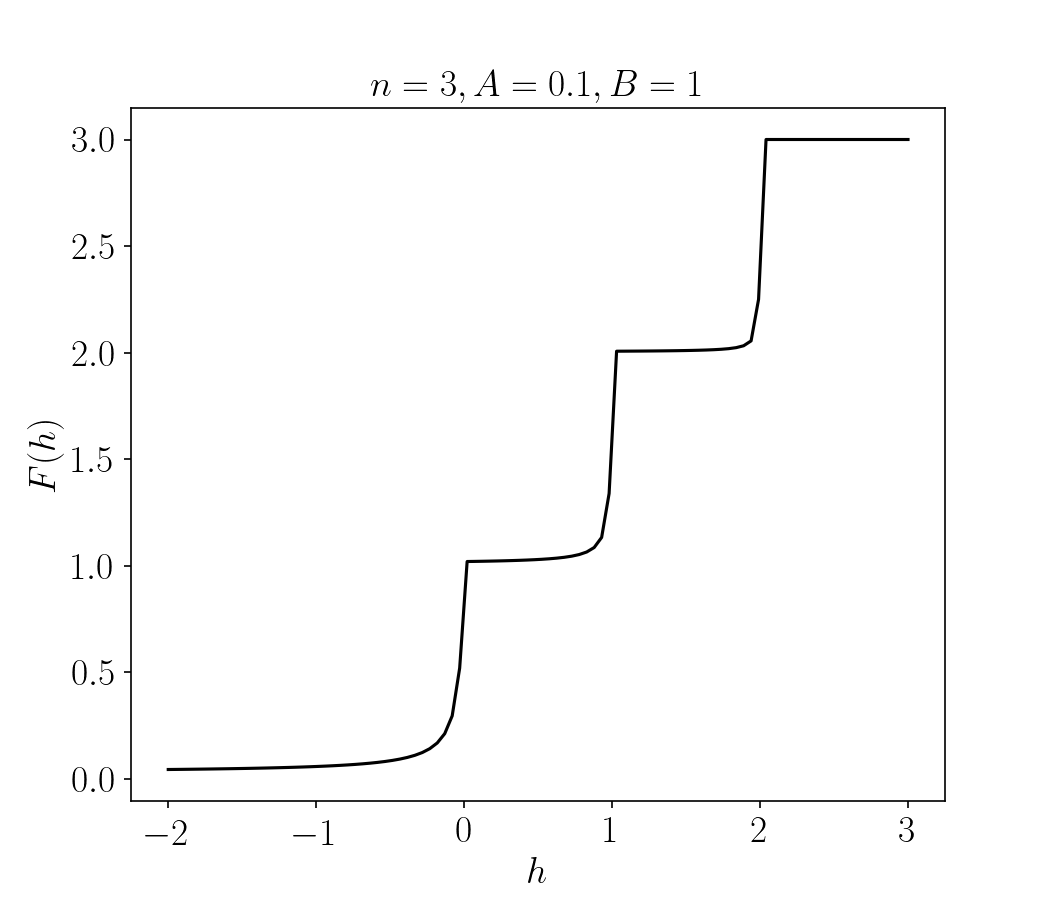

In [3]:
from conc_ineq.bentkus import QFunc

n=3
A=0.1
B=1

q_func = QFunc(n=n, A=A, B=B)
h = np.linspace(-2, n, 100)
fig = plt.figure(figsize=[7, 6])
plt.plot(h, [q_func.F(x) for x in h], 'k')
plt.title(r'$n={}, A={}, B={}$'.format(n, A, B), fontsize=18)
plt.xlabel(r'$h$', fontsize=18)
plt.ylabel(r'$F(h)$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
# plt.savefig("./figure/function_F_n3.pdf", bbox_inches='tight', pad_inches=0)

## Plot P_2 function

<IPython.core.display.Javascript object>


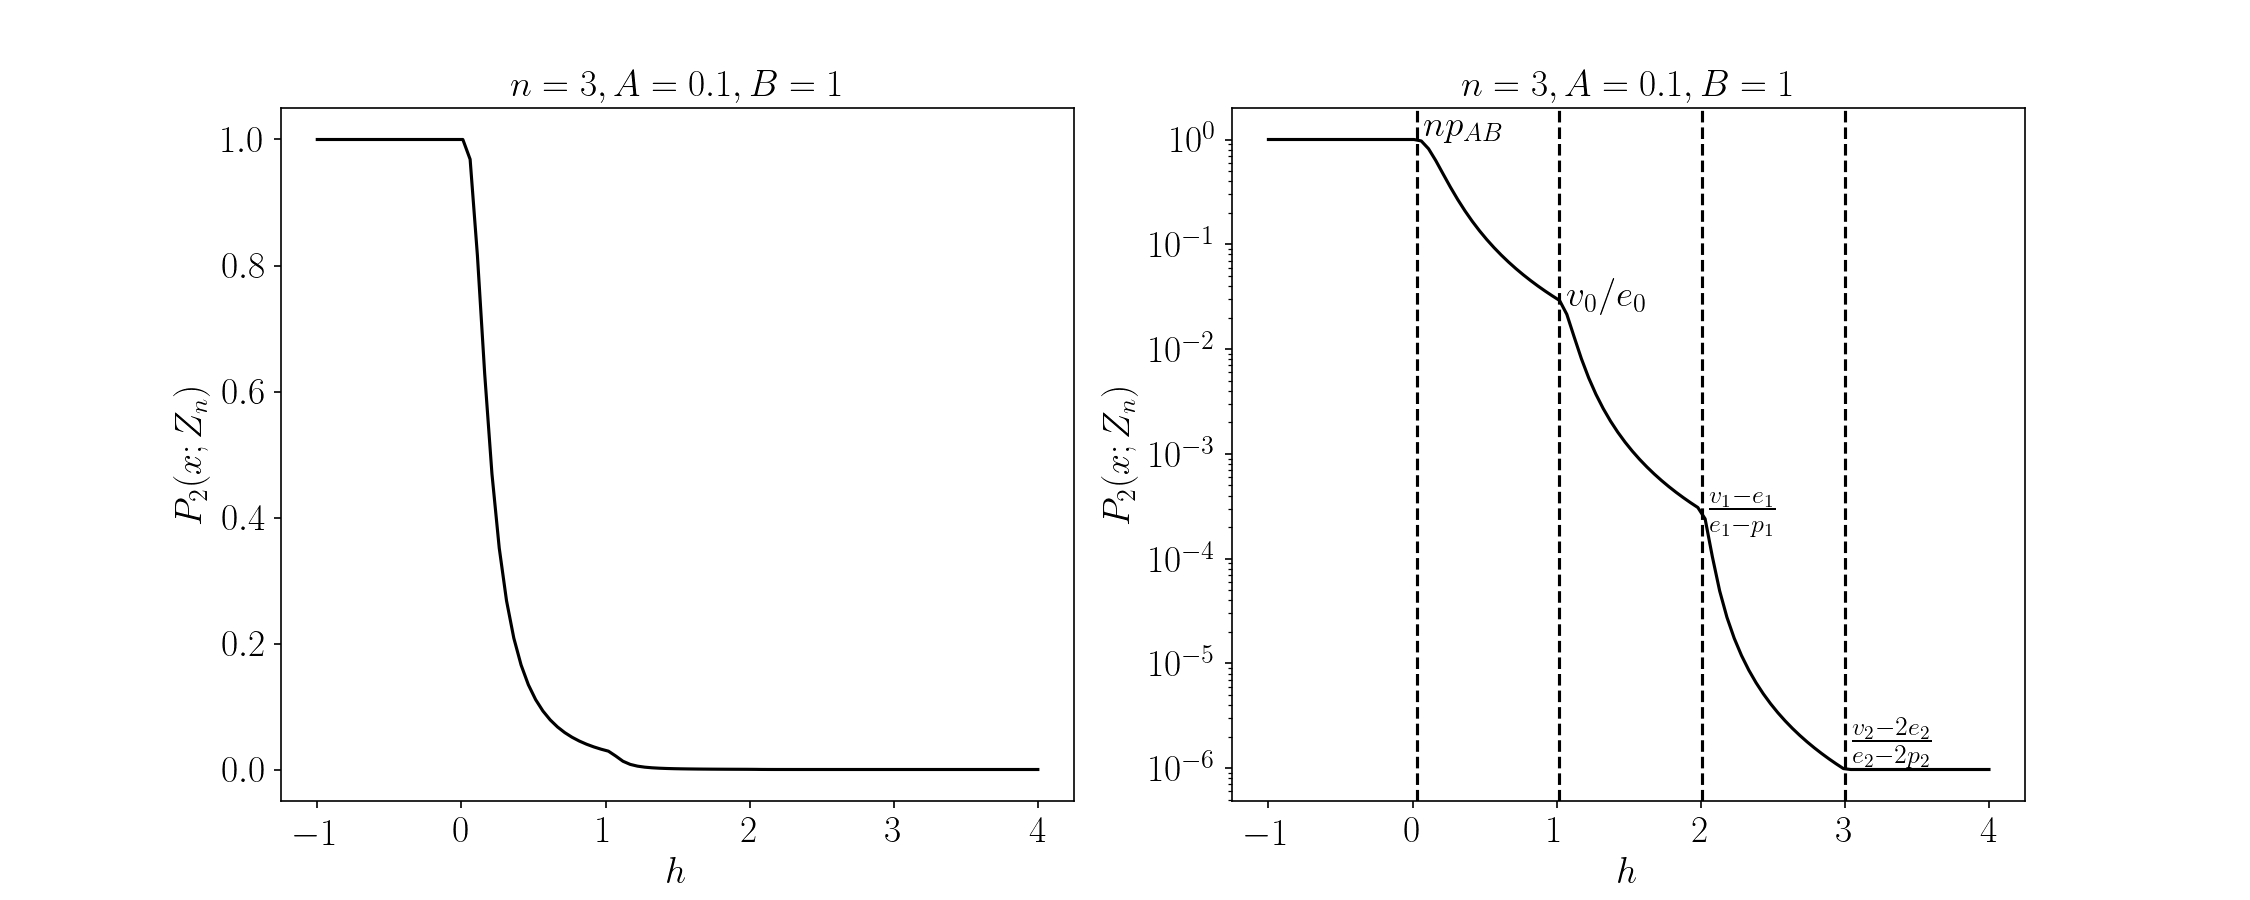

In [4]:
from conc_ineq.bentkus import QFunc

n=3
A=0.1
B=1

q_func = QFunc(n=n, A=A, B=B)
X = np.linspace(-1, n+1, 100)

ratios = [q_func.nb, q_func.v(0) / q_func.e(0)] + [q_func.F(k) for k in range(1, n)]
names = [r'$np_{AB}$', r'$v_0/e_0$', r'$\frac{v_1 - e_1}{e_1 - p_1}$', r'$\frac{v_2 - 2 e_2}{e_2 - 2 p_2}$']
fig, ax = plt.subplots(1, 2, figsize=[15, 6])

ax[0].plot(X, [q_func.P2(x) for x in X], 'k')
ax[0].set_title(r'$n={}, A={}, B={}$'.format(n, A, B), fontsize=18)
ax[0].set_xlabel(r'$h$', fontsize=18)
ax[0].set_ylabel(r'$P_2(x; Z_n)$', fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=18)

ax[1].plot(X, [q_func.P2(x) for x in X], 'k')
ax[1].set_title(r'$n={}, A={}, B={}$'.format(n, A, B), fontsize=18)
ax[1].set_xlabel(r'$h$', fontsize=18)
ax[1].set_ylabel(r'$P_2(x; Z_n)$', fontsize=18)
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='major', labelsize=18)

for k in range(len(ratios)):
    x = ratios[k] + 0.05
    y = q_func.P2(x) * 1.05
    ax[1].text(x, y, names[k], fontsize=18)
    ax[1].axvline(ratios[k],  ymin = 0, ymax= 1.01,linestyle='--', color='k')

# plt.savefig("./figure/function_P2_n3.pdf", bbox_inches='tight', pad_inches=0)


## Hyper Parameters of Stichting

<IPython.core.display.Javascript object>


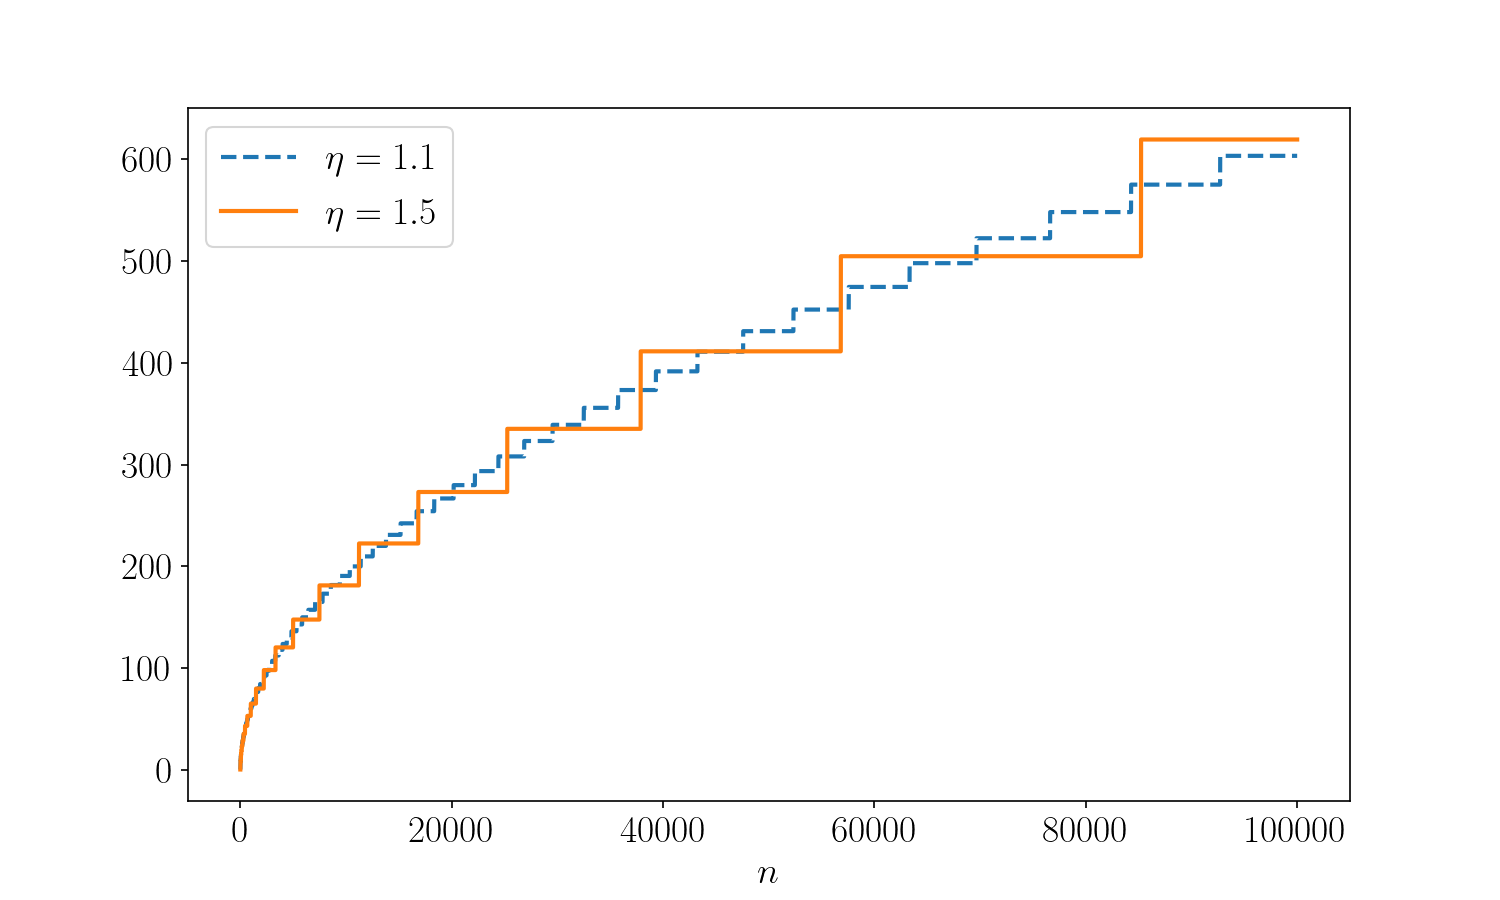

<IPython.core.display.Javascript object>


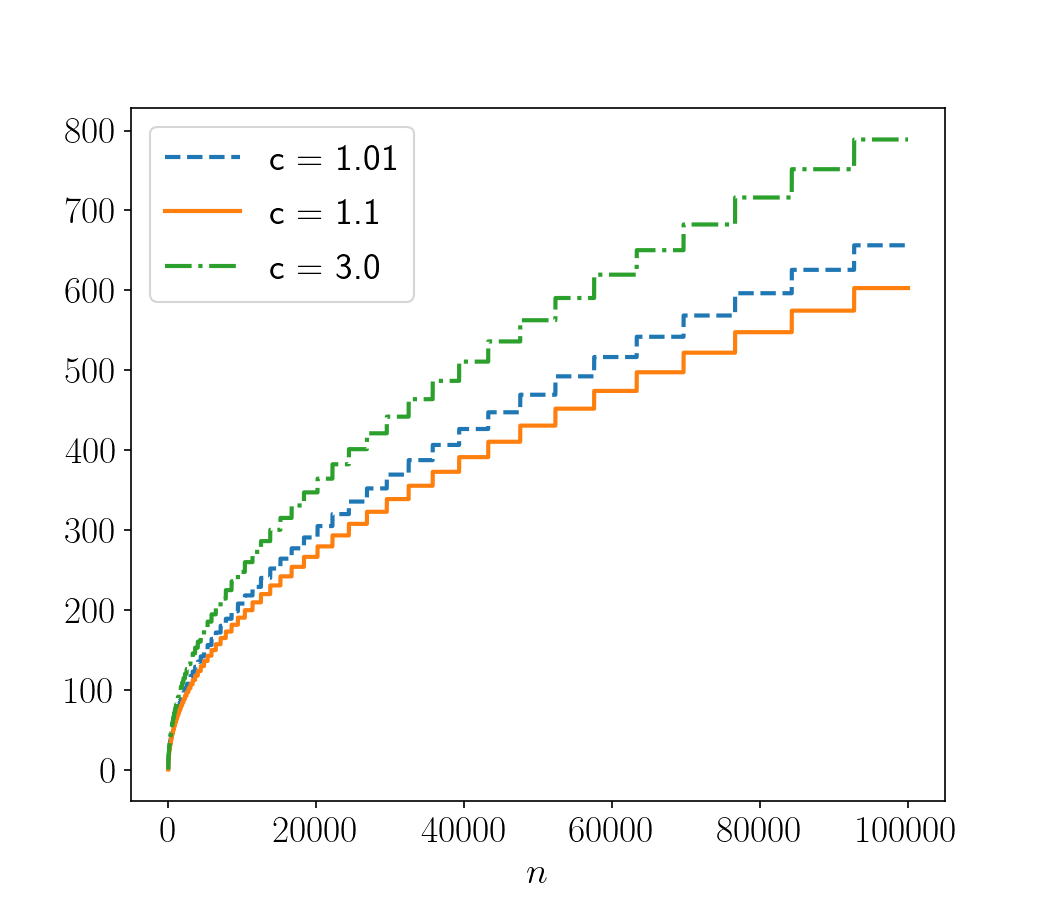

<IPython.core.display.Javascript object>


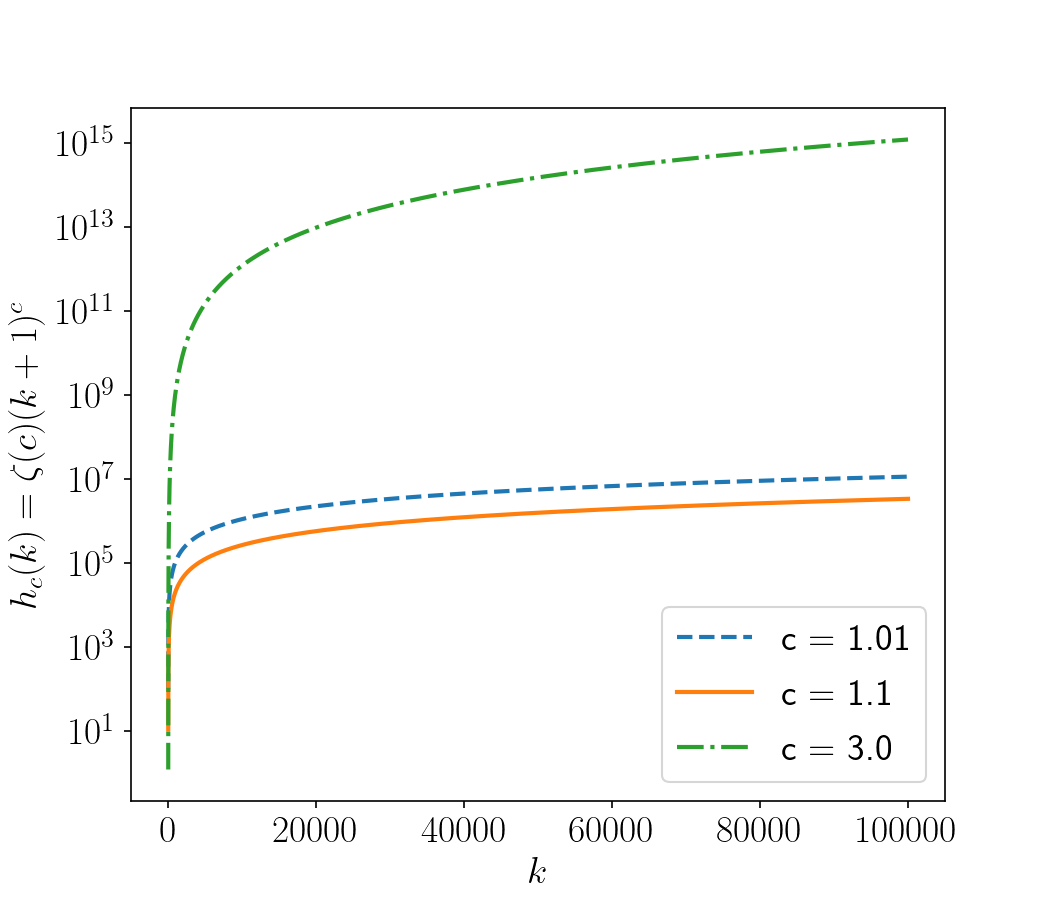

In [7]:
from conc_ineq.bentkus import adaptive_bentkus_seq_known_var

N = int(1e5)
p = 0.25
A = np.sqrt(p*(1-p)) # i.e. A = np.sqrt(3)/4 
B = 1 - p
ns = np.arange(1, N+1)
delta = 0.05


fig = plt.figure(figsize=(10, 6))
f = adaptive_bentkus_seq_known_var(N, delta, A=A, B=B, eta=1.1, power=1.1)
f1 = adaptive_bentkus_seq_known_var(N, delta, A=A, B=B, eta=1.5, power=1.1)
plt.plot(f, '--', linewidth=2)
plt.plot(f1, '-', linewidth=2)
plt.legend([r'$\eta=1.1$', r'$\eta=1.5$'], fontsize=18)  
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel(r'$n$', fontsize=18)
# plt.savefig('./figure/bentkus_different_eta.pdf', bbox_inches='tight', pad_inches=0)


fig = plt.figure(figsize=(7, 6))
f = adaptive_bentkus_seq_known_var(N, delta, A=A, B=B, eta=1.1, power=1.01)
f1 = adaptive_bentkus_seq_known_var(N, delta, A=A, B=B, eta=1.1, power=1.1)
f2 = adaptive_bentkus_seq_known_var(N, delta, A=A, B=B, eta=1.1, power=3.0)
plt.plot(f, '--', linewidth=2)
plt.plot(f1, '-', linewidth=2)
plt.plot(f2, '-.', linewidth=2)
plt.legend(['c = {}'.format(item) for item in [1.01, 1.1, 3.0]], fontsize=18, loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel(r'$n$', fontsize=18)
# plt.savefig('./figure/bentkus_different_power.pdf', bbox_inches='tight', pad_inches=0)

fig = plt.figure(figsize=(7, 6))
h = scipy.special.zeta(1.01, 1) * np.arange(1, N+1)** 1.01
h1 = scipy.special.zeta(1.1, 1) * np.arange(1, N+1)** 1.1
h2 = scipy.special.zeta(3.0, 1) * np.arange(1, N+1)** 3.0
plt.plot(h, '--', linewidth=2)
plt.plot(h1, '-', linewidth=2)
plt.plot(h2, '-.', linewidth=2)
plt.legend(['c = {}'.format(item) for item in [1.01, 1.1, 3.0]], fontsize=18, loc='lower right')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel(r'$k$', fontsize=18)
plt.ylabel(r'$h_c(k) = \zeta(c)(k+1)^c$', fontsize=18)
plt.yscale('log')
# plt.savefig('./figure/h_different_power.pdf', bbox_inches='tight', pad_inches=0)
